In [20]:
from utils import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

# Checking system compatibility

In [21]:
if supportsGPU():
    print('GPU is supported')
else:
    print('GPU is not supported')

GPU is supported


# Creating Data

In [3]:
if not isMoved():
    moveFiles()

In [4]:
trainGenerator = ImageDataGenerator(
    rescale=1/255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

testGenerator = ImageDataGenerator(rescale=1/255.0)

In [5]:
trainSet = trainGenerator.flow_from_directory(
    directory='Dataset/Train',
    target_size=(224,224),
    class_mode='categorical',
    batch_size=64
)

validationSet = trainGenerator.flow_from_directory(
    directory='Dataset/Val',
    target_size=(224,224),
    class_mode='categorical',
    batch_size=64
)

testSet = testGenerator.flow_from_directory(
    directory='Dataset/Test',
    target_size=(224,224),
    class_mode='categorical',
    batch_size=64
)

Found 2224 images belonging to 2 classes.
Found 248 images belonging to 2 classes.
Found 619 images belonging to 2 classes.


In [6]:
labelDict = dict(zip(trainSet.class_indices.values(), trainSet.class_indices.keys()))

# Analyzing the data

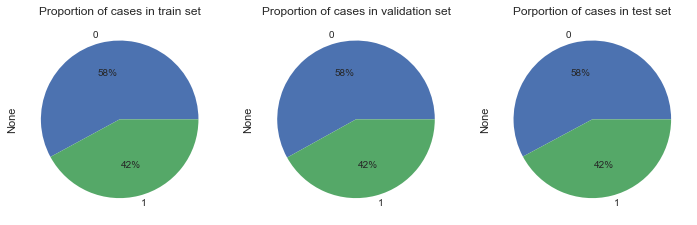

In [7]:
plotProportions(trainSet=trainSet, validationSet=validationSet,testSet=testSet)

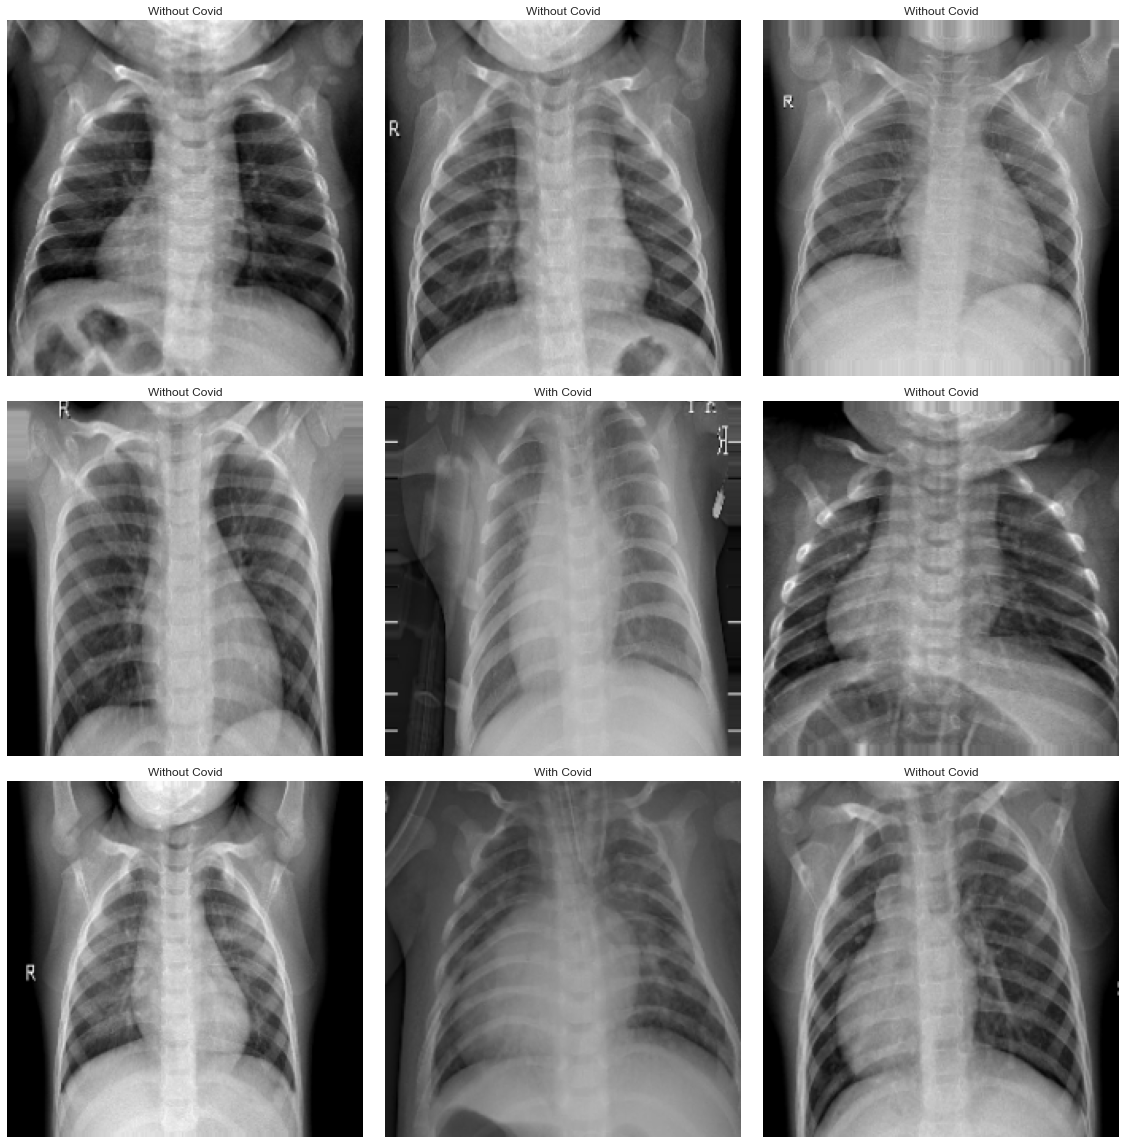

In [8]:
seeExamples(trainSet,labelDict=labelDict,fileName='trainExamples.png')

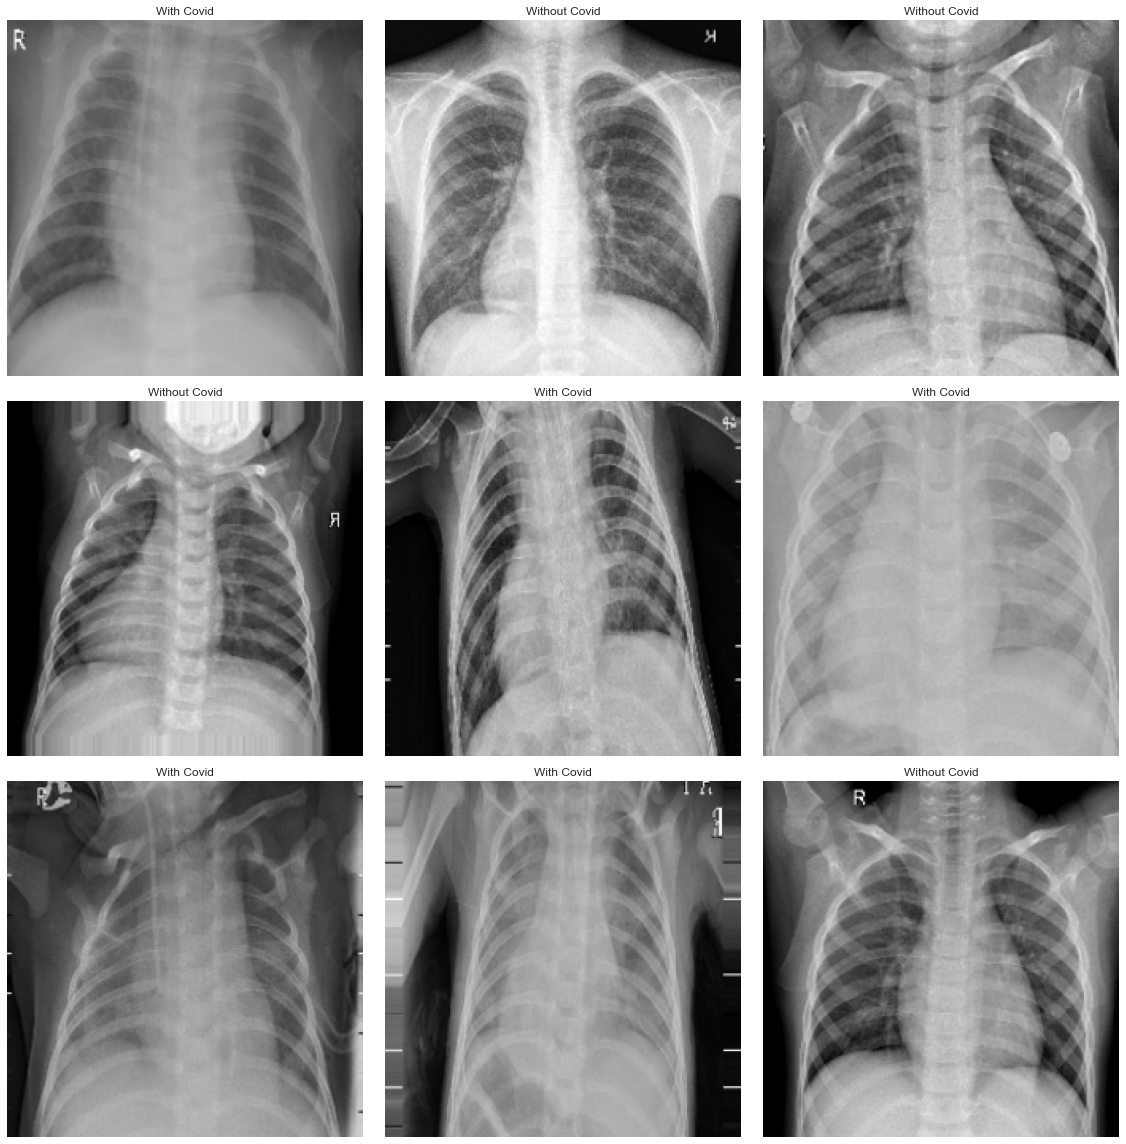

In [9]:
seeExamples(validationSet,labelDict=labelDict,fileName='validationExamples.png')

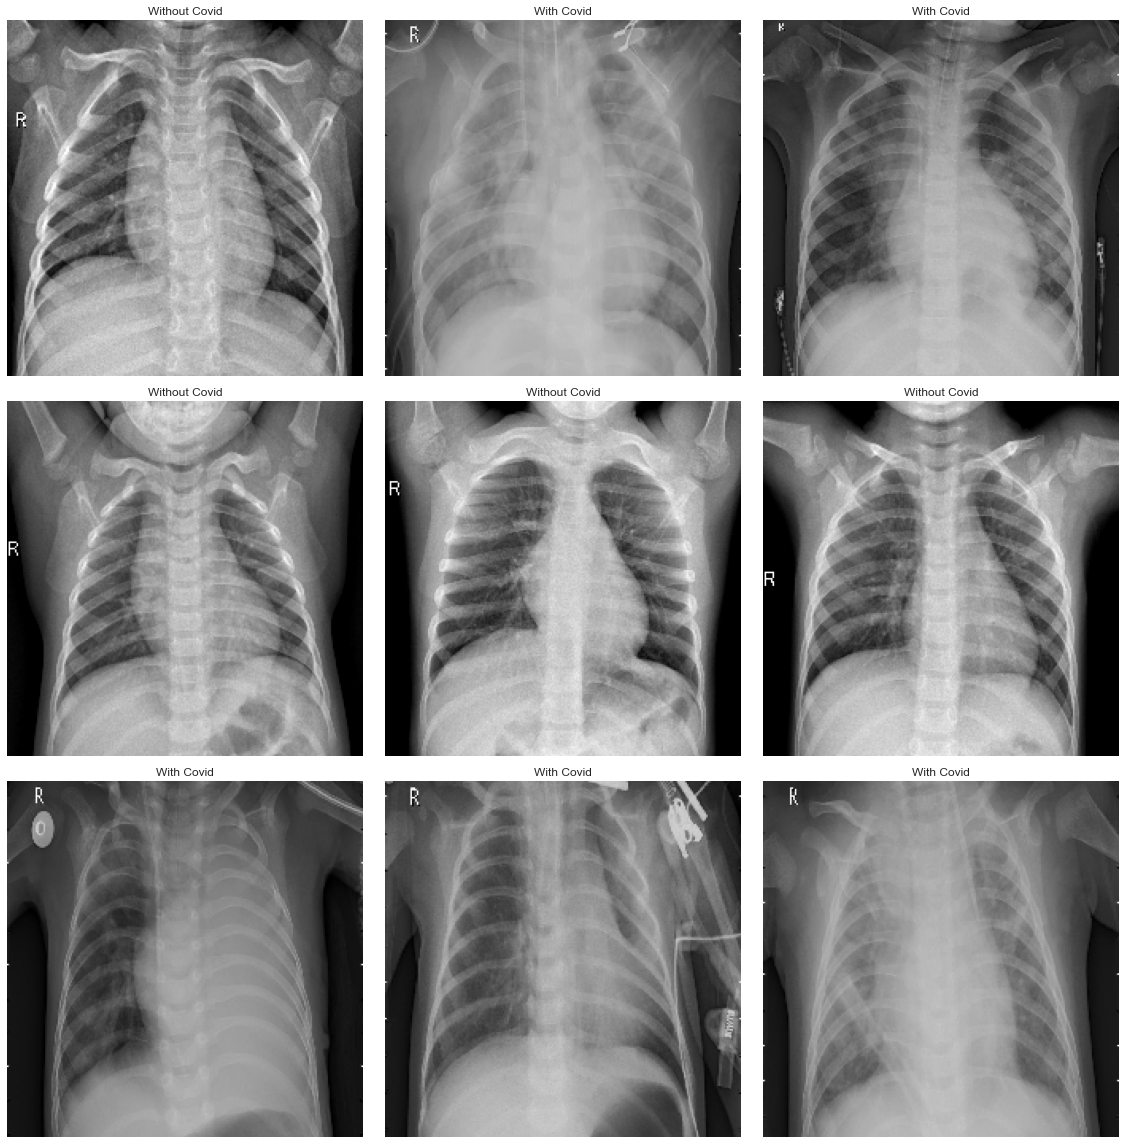

In [10]:
seeExamples(testSet,labelDict=labelDict,fileName='testExamples.png')

# Model Building

In [11]:
model = createModel()

In [12]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 54, 54, 64)        0         
                                                                 
 flatten (Flatten)           (None, 186624)            0

In [13]:
saveBest = ModelCheckpoint(filepath='bestModel.h5',save_best_only=True,save_weights_only=True)
callbacks = [saveBest]

In [14]:
history = model.fit(
    trainSet,
    epochs=10,
    callbacks=callbacks,
    validation_data=validationSet
)

Epoch 1/10
35/35 [==============================] - 99s 3s/step - loss: 2.5053 - categorical_accuracy: 0.5000 - val_loss: 0.6745 - val_categorical_accuracy: 0.5806
Epoch 2/10
35/35 [==============================] - 84s 2s/step - loss: 0.5900 - categorical_accuracy: 0.7014 - val_loss: 0.4487 - val_categorical_accuracy: 0.8266
Epoch 3/10
35/35 [==============================] - 85s 2s/step - loss: 0.3391 - categorical_accuracy: 0.8557 - val_loss: 0.2560 - val_categorical_accuracy: 0.8871
Epoch 4/10
35/35 [==============================] - 83s 2s/step - loss: 0.2587 - categorical_accuracy: 0.8984 - val_loss: 0.2751 - val_categorical_accuracy: 0.8992
Epoch 5/10
35/35 [==============================] - 60s 2s/step - loss: 0.2498 - categorical_accuracy: 0.9033 - val_loss: 0.1915 - val_categorical_accuracy: 0.9274
Epoch 6/10
35/35 [==============================] - 69s 2s/step - loss: 0.2337 - categorical_accuracy: 0.9056 - val_loss: 0.2217 - val_categorical_accuracy: 0.9194
Epoch 7/10
35/35

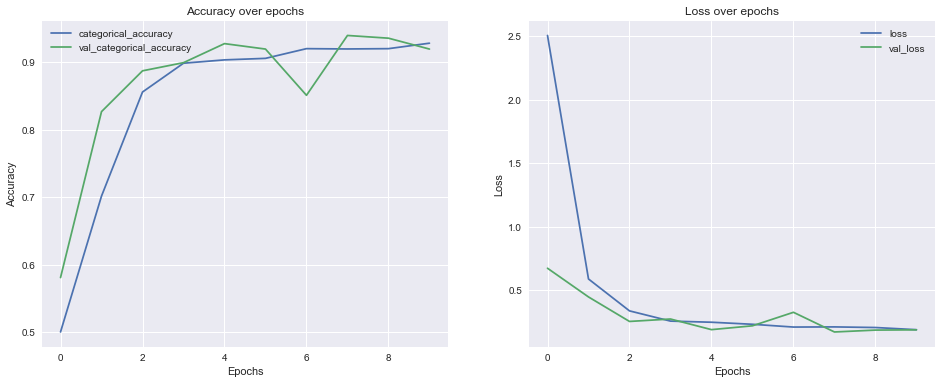

In [15]:
plotHistory(history=history)

In [16]:
bestModel = createModel()
bestModel.load_weights('bestModel.h5')

# Testing the model

In [17]:
evaluateModel(
    model=bestModel,
    trainSet=trainSet,
    validationSet=validationSet,
    testSet=testSet)

10/10 [==============================] - 17s 2s/step - loss: 0.1575 - categorical_accuracy: 0.9418
The accuracy on train set is 93.031%
The accuracy on validation set is 94.758%
The accuracy on test set is 94.184%


In [18]:
testPaths = [
    r'D:\6thSem\DL\Project\Dataset\Test\With Covid\person7_bacteria_24.jpeg',
    r'D:\6thSem\DL\Project\Dataset\Test\Without Covid\IM-0119-0001.jpeg'
]

In [19]:
for path in testPaths:
    pred = predictNew(model=bestModel,filepath=path,labelDict=labelDict)
    print(pred)

With Covid
Without Covid
